<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/unsupervised-learning/unsupervised_learning_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning

In [84]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path
import operator
import urllib.request

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from scipy.stats import pearsonr

print(f'sklearn: {sklearn.__version__}')

sklearn: 0.22.1


## Cluster exploration

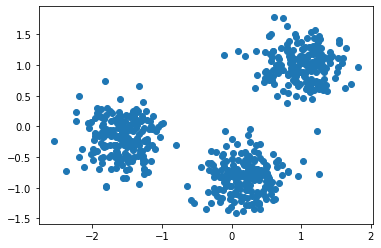

In [2]:
points_dataset = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/clustering_points.csv'
points = pd.read_csv(points_dataset)
xs, ys, xn, yn = train_test_split(points.x, points.y, test_size=0.5, 
                                  random_state=43)
xs = points.x.tolist()
ys = points.y.tolist()
plt.scatter(xs, ys);

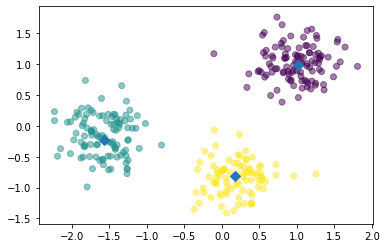

In [3]:
model = KMeans(n_clusters=3)
model.fit(points[:300])
labels = model.predict(points[300:])
plt.scatter(points[300:].x, points[300:].y, c=labels, alpha=0.5)
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
plt.scatter(centroids_x, centroids_y, marker='D', s=50);

## Evaluating a clustering

In [4]:
wheat_seed_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/wheat_seeds_uci.csv'
wheat_seed = pd.read_csv(wheat_seed_url)
wheat_seed.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,C
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
wheat_seed.describe()
 

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,C
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [6]:
wheat_seed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
area                       210 non-null float64
perimeter                  210 non-null float64
compactness                210 non-null float64
length_of_kernel           210 non-null float64
width_of_kernel            210 non-null float64
asymmetry_coefficient      210 non-null float64
length_of_kernel_groove    210 non-null float64
C                          210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [7]:
wheat_seed.shape

(210, 8)

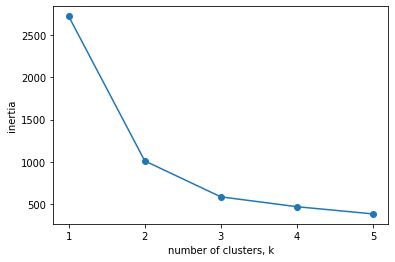

In [8]:
samples = wheat_seed.drop(['C'], axis=1)
ks = range(1, 6)
inertias = []
for k in ks:
  model = KMeans(n_clusters=k)
  model.fit(samples)
  inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks);

In [9]:
samples = wheat_seed.drop(['C'], axis=1)
varieties = wheat_seed['C'] - 1
model = KMeans(n_clusters=3)
labels = model.fit_predict(samples)
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)

varieties   0   1   2
labels               
0           1  60   0
1          60  10   2
2           9   0  68


## Scaling fish dta for clustering

In [10]:
fish_measurements_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/fish.csv'
df = pd.read_csv(fish_measurements_url)
df.head()



,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2


In [0]:
samples = df.drop(['Bream'], axis=1)
species = df['Bream']

In [12]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=4)
pipeline = make_pipeline(scaler, kmeans)

pipeline.fit(samples)
labels = pipeline.predict(samples)

df = pd.DataFrame({'labels': labels, 'species': species})
ct = pd.crosstab(df['labels'], df['species'])

print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            0     0     19      1
1            0    17      0      0
2           33     0      1      0
3            0     0      0     13


In [13]:
stocks_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/company_stock_movements_2010_2015_incl.csv'

df = pd.read_csv(stocks_url)
df.head()

,company,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,2010-01-19,2010-01-20,2010-01-21,2010-01-22,2010-01-25,2010-01-26,2010-01-27,2010-01-28,2010-01-29,2010-02-01,2010-02-02,2010-02-03,2010-02-04,2010-02-05,2010-02-08,2010-02-09,2010-02-10,2010-02-11,2010-02-12,2010-02-16,2010-02-17,2010-02-18,2010-02-19,2010-02-22,2010-02-23,2010-02-24,2010-02-25,2010-02-26,2010-03-01,...,2013-09-04,2013-09-05,2013-09-06,2013-09-09,2013-09-10,2013-09-11,2013-09-12,2013-09-13,2013-09-16,2013-09-17,2013-09-18,2013-09-19,2013-09-20,2013-09-23,2013-09-24,2013-09-25,2013-09-26,2013-09-27,2013-09-30,2013-10-01,2013-10-02,2013-10-03,2013-10-04,2013-10-07,2013-10-08,2013-10-09,2013-10-10,2013-10-11,2013-10-14,2013-10-15,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,6.709993,-3.180006,-4.009998,-9.030006,0.560000,-0.010000,1.030010,-5.640009,-9.019993,2.360001,-0.050001,4.060000,-4.680000,2.829998,-1.570009,-0.229992,-0.769990,3.789993,2.269998,1.459994,-1.639998,1.300003,-0.190005,-1.920004,-2.940000,2.430002,4.619999,2.239998,3.240008,...,-0.869980,-4.980034,-0.219979,1.169960,-11.559998,0.699989,4.190003,-4.439995,-10.879982,7.360008,1.500008,1.599983,-10.589988,-5.459991,-5.779999,-7.669976,0.219979,-1.029983,-0.500038,9.510018,3.929970,-7.100029,-0.829979,1.190040,-9.000045,1.950005,-1.679985,5.820000,6.209969,1.169960,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,0.200001,-0.100000,-0.460001,-1.190001,-0.650000,-1.300001,0.430000,-1.690000,-0.300001,-0.420000,-0.020001,-0.099998,-0.940001,-0.090000,-0.250000,0.760000,3.710001,-0.200001,1.000000,0.000000,-0.630001,0.299999,-0.010000,1.540001,-1.459999,0.830000,0.069999,-0.900000,-2.179998,...,0.680000,0.229999,-0.720002,0.829998,-0.130001,0.340000,-0.620003,0.320000,-0.470001,0.790001,0.279999,-0.930000,-0.020000,-0.439998,0.100003,0.190003,-0.239998,-0.029998,0.020000,0.579998,0.350002,-0.210003,0.660000,-0.310001,-1.099998,0.050000,1.290001,0.330002,0.599999,-0.160000,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,1.300003,-1.349998,-0.639999,-4.169998,-1.790000,-1.079995,1.720001,1.599999,-4.360000,-4.309997,-0.669998,1.979995,-2.699997,1.510002,-2.549995,-0.169998,-0.639999,2.879997,0.670006,-2.529999,-0.760002,2.240006,-0.390007,0.639999,-0.770004,1.760002,0.029999,0.520005,5.840004,...,5.310028,0.470001,0.529998,2.489990,-0.190003,0.730011,-0.530030,-2.220002,-3.760009,6.540008,7.970001,-1.709991,3.799987,-2.520020,1.700012,-1.880005,4.220001,-0.910003,-0.769989,6.730011,2.470001,-5.630005,3.910004,-5.209991,-8.269989,-5.190002,0.540008,6.120026,1.480011,-3.470001,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,0.719997,0.050000,-0.830002,-2.770001,-1.309997,0.559997,0.709999,-1.239998,0.060002,0.369999,0.340000,-0.579998,-0.500000,0.189998,-0.969997,0.270001,0.169998,0.480000,0.629997,0.809998,-0.480000,0.080002,0.170002,-0.169998,-0.810002,0.310002,0.370003,0.039997,-0.070000,...,0.620002,0.639999,-0.570000,0.070008,0.379997,0.480003,0.000000,-0.279999,-0.739998,1.320000,0.650001,-0.239998,-0.300003,-0.849999,-0.319999,-0.139999,0.320000,-0.169999,0.549996,0.290001,-0.549995,-0.090004,0.430001,-0.559998,-0.809998,-0.159996,1.470002,0.730004,0.739998,-0.379997,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.

In [0]:
movements = df.drop(['company'], axis=1)
companies = df['company']

In [15]:
normalizer = Normalizer()
kmeans = KMeans(n_clusters=10)
pipeline = make_pipeline(normalizer, kmeans)
pipeline.fit(movements)
labels = pipeline.predict(movements)
df = pd.DataFrame({'labels': labels, 'companies': companies})
print(df.sort_values(by=['labels']))

    labels                           companies
35       0                            Navistar
10       0                      ConocoPhillips
59       1                               Yahoo
47       1                            Symantec
33       1                           Microsoft
24       1                               Intel
50       1  Taiwan Semiconductor Manufacturing
14       1                                Dell
11       1                               Cisco
51       1                   Texas instruments
26       2                      JPMorgan Chase
55       2                         Wells Fargo
15       2                                Ford
16       2                   General Electrics
1        2                                 AIG
18       2                       Goldman Sachs
3        2                    American express
20       2                          Home Depot
5        2                     Bank of America
58       2                               Xerox
39       3   

## Visualizing hierarchies

In [16]:
wheat_seed_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/wheat_seeds_uci.csv'
wheat_seed = pd.read_csv(wheat_seed_url)
wheat_seed.head(3)

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,C
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1


In [17]:
random_sample = wheat_seed.sample(42)
samples = random_sample.drop(['C'], axis=1)
varieties = random_sample['C'].to_list()
samples.head(3)

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove
124,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
35,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
10,15.26,14.85,0.8696,5.714,3.242,4.543,5.314


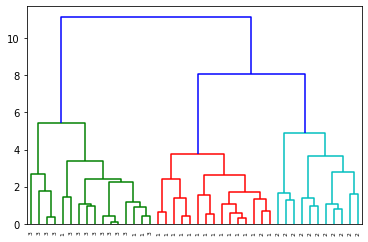

In [18]:
mergings = linkage(samples, method='complete')
dendrogram(
    mergings,
    labels=varieties,
    leaf_rotation=90,
    leaf_font_size=6
);

## Hierarchies of stocks

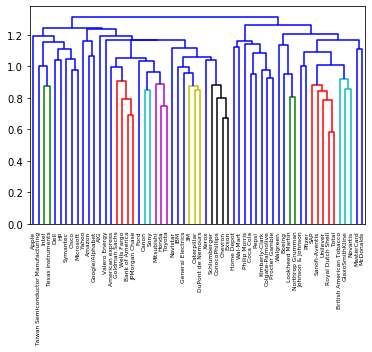

In [19]:
stocks_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/company_stock_movements_2010_2015_incl.csv'
df = pd.read_csv(stocks_url)
movements = df.drop(['company'], axis=1)
companies = df['company'].to_list()

normalized_movements = normalize(movements)
mergings = linkage(normalized_movements, method='complete')
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=6);

## Cluster labels in hirarchical clustering

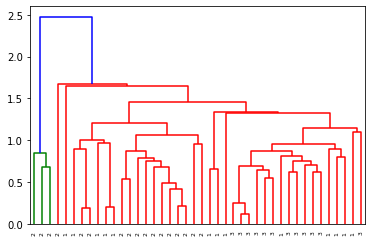

In [20]:
wheat_seed_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/wheat_seeds_uci.csv'
wheat_seed = pd.read_csv(wheat_seed_url)
random_sample = wheat_seed.sample(42)
samples = random_sample.drop(['C'], axis=1)
varieties = random_sample['C'].to_list()
mergings = linkage(samples, method='single')
dendrogram(
    mergings,
    labels=varieties,
    leaf_rotation=90,
    leaf_font_size=6
);

## Extracting the Cluster Labels

In [21]:
wheat_seed_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/wheat_seeds_uci.csv'
wheat_seed = pd.read_csv(wheat_seed_url)
random_sample = wheat_seed.sample(150)
samples = random_sample.drop(['C'], axis=1)
varieties = random_sample['C'].to_list()
mergings = linkage(samples, method='complete')

labels = fcluster(mergings, 6, criterion='distance')
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct);

varieties   1   2   3
labels               
1           0  34   0
2          15  15   0
3           2   0  25
4          36   0  23


## t-SNE visualization of grain dataset

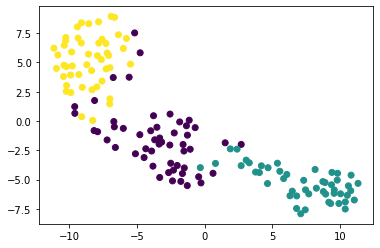

In [22]:
model = TSNE(learning_rate=200)

tsne_features = model.fit_transform(samples)
xs = tsne_features[:,0]
ys = tsne_features[:,1]
plt.scatter(xs, ys, c=varieties);

## A t-SNE of the stock market

In [0]:
stocks_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/company_stock_movements_2010_2015_incl.csv'
df = pd.read_csv(stocks_url)
movements = df.drop(['company'], axis=1)
companies = df['company'].to_list()

normalized_movements = normalize(movements)

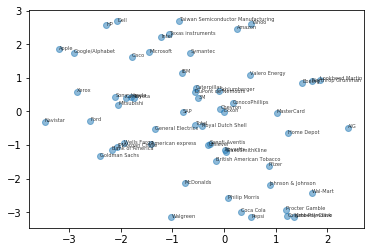

In [24]:
model = TSNE(learning_rate=50)
tsne_features = model.fit_transform(normalized_movements)
xs = tsne_features[:,0]
ys = tsne_features[:,1]
plt.scatter(xs, ys, alpha=0.5);
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)

## Decorrelating data and dimension reduction


0.9943409310122264


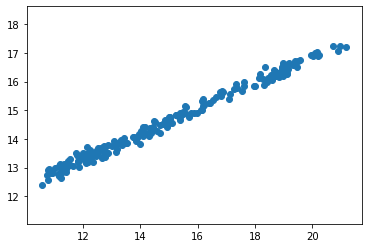

In [25]:
wheat_seed_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/wheat_seeds_uci.csv'
wheat_seed = pd.read_csv(wheat_seed_url)
grains = wheat_seed.drop(['C'], axis=1)
varieties = wheat_seed['C'].to_list()
width = grains.iloc[:, 0]
length = grains.iloc[:,1]
plt.scatter(width, length)
plt.axis('equal');

correlation, pvalue = pearsonr(width, length)
print(correlation)

In [26]:
grains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
area                       210 non-null float64
perimeter                  210 non-null float64
compactness                210 non-null float64
length_of_kernel           210 non-null float64
width_of_kernel            210 non-null float64
asymmetry_coefficient      210 non-null float64
length_of_kernel_groove    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


## Decorrelating the grai mesasurements with PCA

-1.6479873021779667e-17


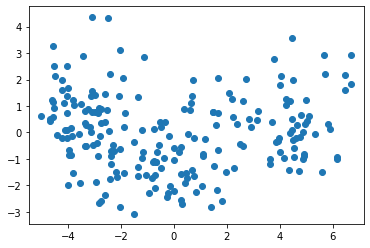

In [27]:
model = PCA() 
pca_features = model.fit_transform(grains)
xs = pca_features[:, 0]
ys = pca_features[:, 1]
plt.scatter(xs, ys)
plt.axis('equal')
correlation, pvalue = pearsonr(xs, ys)
print(correlation)


## PCA intrinsic dimension

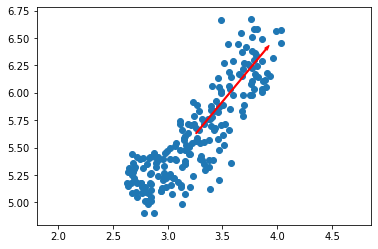

In [28]:
wheat_seed_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/wheat_seeds_uci.csv'
wheat_seed = pd.read_csv(wheat_seed_url)
grains = wheat_seed.drop(['C'], axis=1)
varieties = wheat_seed['C'].to_list()
width = grains['width_of_kernel']
length = grains['length_of_kernel']
grains = list(zip(width, length))
plt.scatter(width, length)
plt.axis('equal');

model = PCA()
model.fit(grains)
x_mean, y_mean = model.mean_
x_first_pc,y_first_pc = model.components_[0,:]
plt.arrow(x_mean, y_mean, x_first_pc, y_first_pc, color='red', width=0.01);


In [31]:
fish_measurements_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/fish.csv'
df = pd.read_csv(fish_measurements_url, names=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7'])
samples = df.drop(['f1'], axis=1)
species = df['f1']
samples.head()

,f2,f3,f4,f5,f6,f7
0,242.0,23.2,25.4,30.0,38.4,13.4
1,290.0,24.0,26.3,31.2,40.0,13.8
2,340.0,23.9,26.5,31.1,39.8,15.1
3,363.0,26.3,29.0,33.5,38.0,13.3
4,430.0,26.5,29.0,34.0,36.6,15.1


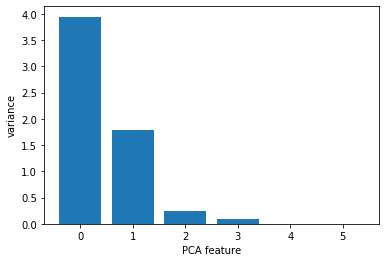

In [35]:
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(samples)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features);

## Dimension reduction of the fish measurements

In [40]:
scaler = StandardScaler()
pca = PCA(n_components=2)
pipeline = make_pipeline(scaler, pca)
pca_features = pipeline.fit_transform(samples)
print(f'PCA features shape: {pca_features.shape}')


PCA features shape: (85, 2)


# A tf-idf word-frequency array

In [43]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']
tfidf = TfidfVectorizer()
csr_mat = tfidf.fit_transform(documents)
print(csr_mat.toarray())
words = tfidf.get_feature_names()
print(words)


[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


## Topic extraction with Non-negative Matrix Factorization and Latent Dirichlet Allocation

"tf-idf" =>
  
  "tf" = frequency of word in document
  "idf" =  reduces teh influence of freauent words

In [65]:
n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20

def print_top_words(model, feature_names, n_top_words):
  for topic_idx, topic in enumerate(model.components_):
    message = 'Topic #%d: ' % topic_idx
    message += ' '.join([feature_names[i] 
                         for i in topic.argsort()[:-n_top_words - 1:-1]])
    print(message)
  print()

print('Loading datasets ...')
data, _ = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'),
                             return_X_y=True)
data_samples = data[:n_samples]
print(f'Dataset loaded: {len(data_samples)}')

# use tf-idf features for NMF
print('Extracting tf-idf features for NMF ...')
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, 
                                   max_features=n_features,
                                   stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data_samples)

tfidf_vectorizer.get_feature_names()[:5]

Loading datasets ...
Dataset loaded: 2000
Extracting tf-idf features for NMF ...


['00', '000', '10', '100', '11']

## NMF applied to Wikepedia articles

In [67]:
model = NMF(n_components=6)
model.fit(tfidf)
nmf_features = model.transform(tfidf)
print(nmf_features)

[[0.05865595 0.00294574 0.00337394 0.         0.         0.        ]
 [0.04927457 0.00570664 0.03518789 0.01745202 0.03181735 0.01011416]
 [0.06742346 0.         0.         0.0198722  0.         0.        ]
 ...
 [0.         0.0426094  0.00271412 0.         0.07291929 0.00062626]
 [0.02920487 0.         0.16723658 0.         0.04952407 0.00949846]
 [0.02419111 0.         0.00077083 0.         0.01609702 0.        ]]


## Text Preprocessing

The following steps will preprocess a corpus of unstructed text documents using scikit-learn, which will use later for topic modelling.

### Loading the Documents

We will use a corpus of news articles collected in 2016. These articles have benn stored in a sinble file and formatted so that one article appears on each line. We will load these articles into a list, and also create a short snippet of text for each document.

In [122]:
raw_documents = []
snippets = []
articles_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/new_articles_2016.txt'
with urllib.request.urlopen(articles_url) as fin:
  for line in fin.readlines():
    text = line.strip().decode('utf-8')
    raw_documents.append(text)
    snippets.append(text[0:min(len(text), 100)])
print(f'Read {len(raw_documents)} raw text documents')

Read 4551 raw text documents


### Creating a Document-Term Matrix

Remove non-informative stopwords. The choice of stopwords can have a considerable impact later on.

In [123]:
articles_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/news_articles_stopwords.txt'
custom_stop_words = []
with urllib.request.urlopen(articles_url) as fin:
  for line in fin.readlines():
    custom_stop_words.append(line.strip().decode('utf-8'))
print(f'Stopword list has {len(custom_stop_words)} entries')

Stopword list has 350 entries


In the bag-of-words model, each document is represented in a m-dimensional coordinate space, where m is number of unique terms across all documents. This set of terms is calle the corpus vocabulary.

Since each document can be represented as a term vector, we can stack these vectors to create a full document-term matrix.

In [124]:
vectorizer = CountVectorizer(stop_words=custom_stop_words, min_df=20)
A = vectorizer.fit_transform(raw_documents)
print(f'Created {A.shape[0]} X {A.shape[1]} document-term matrix')

Created 4551 X 10285 document-term matrix


The above step also builds a vocabulary for the corpus:

In [125]:
terms = vectorizer.get_feature_names()
print(f'Vocabulary has {len(terms)} distinct terms.')

Vocabulary has 10285 distinct terms.


### Applying term weighting with TF-IDF

We can improve the usefulness of teh document-term matrix by giving more weight to the more ***important*** terms. The most common normalization is Term Frequency-inverse document frequency (TF-IDF) 

In [126]:
vectorizer = TfidfVectorizer(stop_words=custom_stop_words, min_df=20)
A = vectorizer.fit_transform(raw_documents)
print(f'Created {A.shape[0]} X {A.shape[1]} TF-IDF-normalized document-term matrix')

Created 4551 X 10285 TF-IDF-normalized document-term matrix


In [127]:
terms = vectorizer.get_feature_names()
print(f'Vocabulary has {len(terms)} distinct terms.')

Vocabulary has 10285 distinct terms.


A simple characterization shows the terms with the highest TF-IDF scores across all documents in the document-term matrix.

In [0]:
def rank_terms(A, terms):
  # get the sums over each column
  sums = A.sum(axis=0)
  # map weights to the terms
  weights = {}
  for col, term in enumerate(terms):
    weights[term] = sums[0,col]
  # rank the terms by their weight over all documents
  return sorted(weights.items(), key=operator.itemgetter(1), reverse=True)

We can now display a ranking the top 20 terms.

In [129]:
ranking = rank_terms(A, terms)
for i, pair in enumerate(ranking[0:20]):
  print(f'{i+1}. {pair[0]} ({pair[1]})')

1. trump (190.8652001154262)
2. people (109.89616714786753)
3. eu (109.17116595433342)
4. film (91.35310087379379)
5. uk (89.09612800619671)
6. bank (78.68887316032057)
7. time (76.1245969072553)
8. brexit (67.97645781224288)
9. health (61.59061143019152)
10. government (60.24038287986317)
11. back (60.237836822399366)
12. clinton (59.954199611113644)
13. get (57.37031343453309)
14. world (56.85116429879675)
15. campaign (56.351900920426324)
16. women (55.820656812684085)
17. way (54.94961040959175)
18. before (54.604874296518496)
19. vote (54.32677843143657)
20. work (54.04347491046123)


## NMF Topic Models

Topic modelling aims to automatically discover the hidden thematic structure in a large corpus of text documents.

Tunning NMF requires to define the number of topics to generate ***k***.

In [0]:
k = 10

NMF could be initialized randomly, this method will produce different results each run. However, SVD based initialization could be use for reproducibility.

In [0]:
model = NMF(init='nndsvd', n_components=k)
# apply the mdoel and extract the two factor matrices
W = model.fit_transform(A)
H = model.components_

### Examining the output

NMF produces to factor matrices as its output: W and H.

The W factor contains the document membership weights relative to each of the k topics. Each row corresponds toa single document, and each column corresponds to a topic.

In [132]:
W.shape

(4551, 10)

For instance, the first document appears to be strongly associated with one topic. 

In [133]:
W[0,:].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.  , 0.  , 0.  , 0.01])

In [134]:
W[4,:].round(2)

array([0.  , 0.13, 0.01, 0.  , 0.01, 0.01, 0.01, 0.01, 0.05, 0.01])

The H factor contains the term weights relative to each of the k topics.

In [135]:
H.shape

(10, 10285)

We can observe that the term "brexit" is strongly associated with a large single topic.

In [136]:
term_index = terms.index('brexit')
H[:, term_index].round(2)

array([0.99, 0.  , 0.  , 0.  , 0.04, 0.  , 0.  , 0.  , 0.25, 0.  ])

## Topic descriptors



In [0]:
def get_descriptor(terms, H, topic_index, top):
  top_indices = np.argsort(H[topic_index,:])[::-1]
  top_terms = []
  for term_index in top_indices[0:top]:
    top_terms.append( terms[term_index] )
  return top_terms

In [138]:
descriptors = []
for topic_index in range(k):
    descriptors.append( get_descriptor( terms, H, topic_index, 10 ) )
    str_descriptor = ", ".join( descriptors[topic_index] )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )


Topic 01: eu, uk, brexit, britain, european, leave, europe, vote, referendum, trade
Topic 02: trump, clinton, donald, republican, campaign, president, hillary, cruz, sanders, presidential
Topic 03: film, films, movie, star, director, hollywood, actor, story, drama, cinema
Topic 04: league, season, leicester, goal, premier, united, city, liverpool, game, ball
Topic 05: bank, banks, banking, financial, rbs, customers, shares, deutsche, barclays, lloyds
Topic 06: health, nhs, care, patients, mental, doctors, hospital, people, services, junior
Topic 07: album, music, band, song, pop, songs, rock, love, sound, bowie
Topic 08: facebook, internet, online, twitter, users, google, people, media, company, amazon
Topic 09: labour, party, corbyn, cameron, referendum, vote, voters, campaign, johnson, minister
Topic 10: women, abortion, woman, men, cancer, female, ireland, girls, rights, northern


In [0]:

def plot_top_term_weights( terms, H, topic_index, top ):
    # get the top terms and their weights
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    top_terms = []
    top_weights = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
        top_weights.append( H[topic_index,term_index] )
    # note we reverse the ordering for the plot
    top_terms.reverse()
    top_weights.reverse()
    # create the plot
    fig = plt.figure(figsize=(13,8))
    # add the horizontal bar chart
    ypos = np.arange(top)
    ax = plt.barh(ypos, top_weights, align="center", color="green",tick_label=top_terms)
    plt.xlabel("Term Weight",fontsize=14)
    plt.tight_layout()
    plt.show()

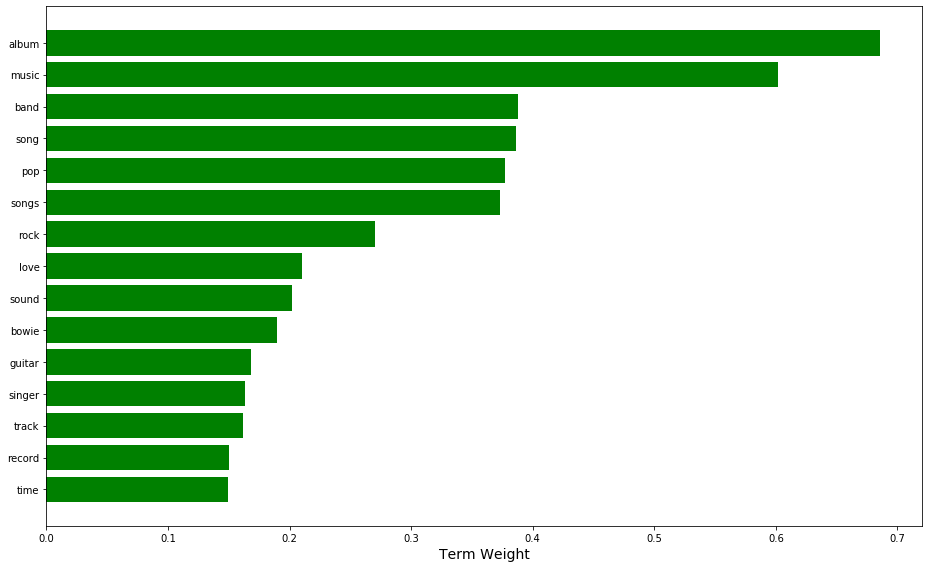

In [140]:
plot_top_term_weights( terms, H, 6, 15 )

In [0]:
def get_top_snippets( all_snippets, W, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( W[:,topic_index] )[::-1]
    # now get the snippets corresponding to the top-ranked indices
    top_snippets = []
    for doc_index in top_indices[0:top]:
        top_snippets.append( all_snippets[doc_index] )
    return top_snippets

In [142]:
topic_snippets = get_top_snippets( snippets, W, 0, 10 )
for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ( (i+1), snippet ) )

01. Brexit X-men: how the prime minister’s key negotiators are coping When Boris Johnson was working for
02. Archbishop accuses Farage of racism and 'accentuating fear for political gain' – EU referendum live 
03. Brexit could shift Europe's political centre of gravity, says Fitch A vote for Brexit in next month’
04. EU leaders line up to insist UK will pay a high price for Brexit stance Britain and the EU appear mo
05. Would Brexit make UK businesses less competitive? In this week’s EU referendum Q&A our panel discuss
06. David Cameron: being in the EU gives Britain key counter-terrorism information David Cameron has sai
07. Slovakian foreign minister: I will support any measure to stop Brexit The new Slovakian EU presidenc
08. Brexit weekly briefing: we're going to be kept in the dark Welcome to the weekly Brexit briefing, a 
09. What would Brexit mean for housing, regeneration and central government? Housing and regeneration: T
10. Cameron names referendum date as Gove declares for 

In [143]:
topic_snippets = get_top_snippets( snippets, W, 1, 10 )
for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ( (i+1), snippet ) )

01. Donald Trump: money raised by Hillary Clinton is 'blood money' – as it happened Hillary Clinton deli
02. Second US presidential debate – as it happened Here’s how searches for “Hillary Clinton” and “Donald
03. Trump campaign reportedly vetting Christie, Gingrich as potential running mates – as it happened Don
04. Donald Trump hits delegate count needed for Republican nomination – as it happened On the one hand, 
05. Trump: 'Had I been president, Capt Khan would be alive today' – as it happened Speaking with ABC New
06. Clinton seizes on Trump tweets for day of campaigning in Florida – as it happened Donald Trump was a
07. Melania Trump defends husband's 'boy talk' in CNN interview – as it happened Speaking to CNN’s Ander
08. Hillary Clinton: 'I'm sick of the Sanders campaign's lies' – as it happened One of the most importan
09. Donald Trump at the White House: Obama reports 'excellent conversation' – as it happened Are you adj
10. Donald Trump: Hillary Clinton has 'no right to be r